# $\text{Transport Optimal}$


<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">

### $\text{Table des Matières}$

I. [Présentation](#section-1)
   1. [Les Racines du Transport Optimal](#sous-section-31)
   2. [XVIIIe siècle : Introduction des mathématiques dans la logistique avec Le problème de Monge](#sous-section-22)
   3. [Relaxation de Kantorovich](#sous-section-23)
   4. [Dualité de Monge-Kantorovich](#sous-section-24)
   5. [Lien entre Transport Optimal EDP: Théorème de Brenier](#sous-section-25)
   5. [Mesure de Wasserstein](#sous-section-25)
   
II. [Implémentation](#section-2)
   1. [Fonction permettant de tracer une direction aléatoire](#sous-section-21)
   2. [Pojection et tri des échantillons](#sous-section-21)
   3. [Boucle principale de l'approche par tranches](#sous-section-21)
   4. [Advanced features: Batches](#sous-section-21)
   5. [Advanced features: Regularization](#sous-section-22)
6. [Code avec interface graphique](#sous-section-23)

</div>

### $\underline{\text{I.  Présentation}}$

<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">L'histoire du transport optimal, également connu sous le nom de problème de transport, est un domaine de recherche en mathématiques et en sciences appliquées qui a une longue histoire riche en contributions importantes de divers acteurs. En réalité, le problème du transport optimal tel que nous le définissons aujourd'hui est relativement récent, l'analyse du transport optimal remonte à plusieurs siècles et a évolué grâce aux travaux de mathématiciens, d'ingénieurs, d'économistes et de chercheurs dans des domaines connexes. Dans cette introduction détaillée, nous allons explorer les jalons historiques de ce domaine en mettant en lumière les contributions significatives.
</div>

##### $\underline{\text{   1.  Les Racines du Transport Optimal}}$


<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">Le concept du transport optimal remonte à l'Antiquité, où les civilisations anciennes  ont été confrontées à des défis logistiques pour acheminer des ressources vers des destinations stratégiques. Même si les concepts mathématiques modernes n'étaient pas encore développés, cette période a jeté les bases de la réflexion sur la distribution optimale des ressources.
        L'Égypte ancienne illustre l'ingénierie avancée et la logistique nécessaires à la construction des pyramides. Les Égyptiens ont utilisé des méthodes de transport ingénieuses, telles que des bateaux sur le Nil, des traîneaux en bois et des techniques de levage.
        L'Empire romain se distingue par son organisation logistique avancée, en particulier dans le contexte militaire. La construction de routes ("viae") a facilité le déplacement des légions et des fournitures militaires, tandis que des techniques avancées ont amélioré l'efficacité des transports terrestres.
        En Chine antique, le Grand Canal a joué un rôle majeur dans le transport fluvial, reliant les rivières Jaune et Yangtsé. Les routes de la soie ont été des voies de communication essentielles pour le commerce et le transport entre l'Est et l'Ouest.
        Ces exemples montrent que, bien que le transport optimal n'ait pas été formalisé comme une discipline mathématique à l'époque, les sociétés anciennes ont résolu des problèmes logistiques en développant des solutions pratiques. Cependant, il a fallu des millénaires avant que les idées sur l'optimisation du transport ne soient formellement développées, marquant la transition vers le XVIIIe siècle où les mathématiques et l'ingénierie ont commencé à jouer un rôle croissant dans la résolution de problèmes logistiques.

</div>

##### $\underline{\text{2. XVIIIe siècle : Introduction des mathématiques dans la logistique: Le problème de Monge}}$


<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">

Le XVIIIe siècle a été témoin d'une évolution significative dans la formalisation des problèmes de transport. L'un des précurseurs importants était le mathématicien français Gaspard Monge. Monge a contribué à la géométrie descriptive, qui a fourni des méthodes graphiques pour représenter des objets tridimensionnels, et ces idées ont influencé la modélisation des problèmes de transport. 

Dans $\textit{Mémoire sur la théorie des déblais et des remblais}$ de 1781, Gaspard Monge formalise pour la première fois le problème du transport optimal pour des applications militaires en se demandant quelle est la façon la plus économique de déplacer des tas de sable, les déblais, vers des trous, les remblais. Cette énonciation laisse suggérer que le problème est simple, mais en réalité il met en jeu une combinatoire très importante rendant ainsi le problème extrêmement difficile, si bien que Gaspard Monge ne trouvera pas de réponse à la résolution du problème et qu'en 1884, l'Académie des Sciences propose un prix à quiconque obtiendra des avancées majeures sur la question.


La situation peut être modélisée en considérant deux mesures de probabilité $ \mu $ et $ \nu $. 
- $\mu$ la distribution source, symbolisant la répartition de la masse dans le tas de sable.
- $\nu $ a répartition de la masse dans le trou une fois celui-ci bouché.

Le problème est de trouver le moyen de déplacer des tas de sable avec le plus petit coût de transport possible.
Formellement, pour chaque point $ x $ dans l'espace source $ \mathcal{X} $ et $ \mathcal{Y} $ dans l'espace cible $ Y $, le coût est mesuré par une fonction $ c(x, y) $. Le problème peut être exprimé comme suit :

$$ \text{Minimiser} \quad \int_\mathcal{X} c(x, T(x)) \, d\mu(x) \$$

sous la contrainte que $ T $ soit une fonction mesurable telle que $ T_\# \mu = \nu $, où $ T_\# \mu $ est la mesure image de $ \mu $ par $ T $. Cela signifie que la masse totale transportée de la source vers la cible doit être égale à la masse cible.

Le Problème de Monge pose des défis théoriques et computationnels en raison de la nécessité de trouver une correspondance directe entre chaque point source et point cible, ce qui peut être difficile dans des espaces de grande dimension.

##### $\underline{\text{3. Relaxation de Kantorovich}}$
La Relaxation de Kantorovich, introduite par Leonid Kantorovich dans les années 1940, offre une approche plus flexible du Problème de Transport Optimal. Plutôt que de restreindre les correspondances à des liaisons directes, Kantorovich propose de considérer des plans de transport, représentés par des distributions de probabilité sur l'espace produit des sources et des cibles. Cela se formalise par la recherche d'une mesure de probabilité $T$ sur $X \times Y$ minimisant le coût total de transport :

$$ \text{Minimiser} \quad \int_{X \times Y} c(x, y) \, dT(x, y) $$

sous les contraintes que $ T $ soit une mesure de probabilité avec $ \mu $ et $ \nu $ comme marginales. Cette approche autorise une variété de correspondances entre les points source et cible, offrant ainsi une solution plus souple.
La Relaxation de Kantorovich introduit une souplesse considérable en permettant à $T$ d'être une mesure de probabilité avec $\mu$ et $\nu$ comme marginales. Concrètement, cela signifie que les distributions marginales de $T$ sur $X$ et $Y$ correspondent respectivement à $\mu$ et $\nu$. Cette approche offre une variété de correspondances entre les points source et cible, élargissant ainsi considérablement l'espace des solutions possibles.

$\textbf{Interprétation: }$

L'interprétation du problème de Kantorovich peut être illustrée en utilisant l'exemple de la masse de Dirac. Considérons deux espaces métriques, $X$ et $Y$, avec des distributions de probabilité $\mu$ et $\nu$, respectivement. Supposons que $\mu$ soit une masse de Dirac concentrée en un point $x_0$ de $X$, indiquant que toute la masse est localisée en un seul endroit.

Dans le cadre du problème de transport optimal, l'objectif est de déterminer le moyen le plus économique de déplacer cette masse de Dirac vers la distribution $\nu$. Si $\nu$ est également une masse de Dirac concentrée en un point $y_0$ de $Y$, alors le déplacement de la masse de $x_0$ à $y_0$ constitue une solution évidente.

Le théorème de Jirina introduit un noyau de transition $\lambda : X \times Y \rightarrow [0, 1]$ qui permet de répartir la masse présente en $x$ dans le trou, représenté par $\lambda(x, \cdot)$. Si toute la masse en $x$ est envoyée vers $T(x)$, le noyau de transition devient $\lambda(x, \cdot) = \delta_{T(x)}$, ce qui ramène l'expression du coût dans le problème de Monge à :

$$ \int_{X\times Y} c(x, y) \, d\pi(x, y) = \int_{X} \left( \int_{Y} c(x, y) \, d\lambda_x(y) \right) d\mu(x) = \int_{X} c(x, T(x)) \, d\mu(x). $$

Dans cet exemple, la distribution de masse de Dirac met en évidence des scénarios où des solutions optimales peuvent être atteintes de manière triviale, soulignant la particularité du problème de transport optimal dans de telles situations.

</div>

##### $\underline{\text{4. Dualité de Monge-Kantorovich}}$

<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">

$\textbf{Formulation Primal (Problème de Monge–Kantorovich) :}$
Le problème primal consiste à minimiser la fonction coût $c(x, y)$ intégrée sur l'espace produit $ X \times Y$, sous les contraintes des marginales égales aux distributions de masse $\mu$ et $\nu$, respectivement. On exprime cela comme suit :
$$ \min_{\pi \in \Pi(\mu, \nu)} \int_{X \times Y} c(x, y) \, d\pi(x, y) $$
sous les contraintes :
$$ \int_X d\pi(x, y) = \mu(x) \quad \text{et} \quad \int_Y d\pi(x, y) = \nu(y) $$

$\textbf{Formulation Duale (Problème de Fonctions Convexes) :}$
La formulation duale implique la maximisation de la somme des intégrales de deux fonctions convexes $\phi(x)$ et $\psi(y)$ liées aux distributions $\mu$ et $\nu$. La dualité de Monge–Kantorovich énonce que ces deux problèmes sont équivalents. Cela s'exprime comme suit :
$$ \min_{\pi \in \Pi(\mu, \nu)} \int_{X \times Y} c(x, y) \, d\pi(x, y) = \max_{\substack{\phi \in \text{Conv}(X) \\ \psi \in \text{Conv}(Y)}} \left( \int_X \phi(x) \, d\mu(x) + \int_Y \psi(y) \, d\nu(y) \right) $$

où $\text{Conv}(X)$ et $\text{Conv}(Y)$ sont les ensembles des fonctions convexes sur $X$ et $Y$ respectivement. Les fonctions convexes $\phi$ et $\psi$ sont liées par la transformée de Legendre-Fenchel.

Cette dualité offre une perspective puissante pour résoudre le problème de transport optimal et établir une connexion profonde entre les coûts de transport et les fonctions convexes. Elle a des implications importantes dans plusieurs domaines des mathématiques appliquées.

La Dualité de Monge-Kantorovich fournit donc une perspective sur le transport optimal en considérant des plans de transport et en permettant des correspondances plus flexibles entre les distributions. Cependant, cette approche n'énonce pas explicitement la nature géométrique du transport optimal
</div>


##### $\underline{\text{5. Lien entre Transport Optimal EDP: Théorème de Brenier}}$


<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">

Le théorème de Monge-Ampère/Benamou-Brenier établit un lien fondamental entre le transport optimal et une fonction convexe, apportant une perspective enrichissante sur la nature mathématique du transport optimal.

Selon ce théorème, le transport optimal peut être interprété comme le gradient d'une fonction convexe spécifique. Plus précisément, il existe une fonction convexe $\Phi:\mathbb{R}^d\rightarrow\mathbb{R}$, où $d$ est la dimension de l'espace sous-jacent, telle que le transport optimal $T$ peut être exprimé comme le gradient de cette fonction: $$ T = \nabla \Phi $$
 où $\nabla$ représente l'opérateur gradient. 

Cette connexion profonde entre le transport optimal et une fonction convexe offre une compréhension plus profonde du problème en reliant les concepts de transport optimal et de convexité.

Cette interprétation suggère que le transport optimal peut être formulé comme un problème d'optimisation de la fonction convexe $\Phi$, soulignant ainsi son lien avec les EDP. 

  - $\textbf{Convexité de Phi :}$ La fonction $\Phi$ est convexe, ce qui signifie que la ligne reliant deux points sur le graphe de $\Phi$ se trouve entièrement au-dessus du graphe lui-même. Mathématiquement, pour tout $x, y \in \mathbb{R}^d$ et pour tout $\lambda \in [0, 1]$, la convexité est exprimée par l'inégalité :  
     $$\Phi(\lambda x + (1-\lambda)y) \leq \lambda \Phi(x) + (1-\lambda)\Phi(y) $$

  - $\textbf{Continuité de Phi :}$ La fonction $\Phi$ est continue.

  - $\textbf{Dérivabilité de Phi :}$ La fonction $\Phi$ est au moins partiellement dérivable, et dans le cas idéal $\Phi$ est différentiable, permettant ainsi la formation du gradient $\nabla \Phi$ qui caractérise le transport optimal.

  - $\textbf{Croissance asymptotique de Phi :}$ La fonction $\Phi$ peut également être caractérisée par une croissance asymptotique appropriée. Cela garantit que $\Phi$ ne devient pas infiniment grande à des distances infinies, contribuant ainsi à sa stabilité

Les propriétés de convexité jouent un rôle central dans cette connexion pour étudier et résoudre le transport optimal dans des contextes plus généraux.

Cependant, bien que le transport optimal résolve efficacement le problème du transport optimal entre deux distributions de probabilité, la mesure de la différence entre ces distributions reste un défi. C'est là que la $\underline{\text{mesure de Wasserstein}}$ entre en jeu, offrant une métrique robuste pour évaluer la similarité entre des distributions de probabilité sur des espaces métriques.

</div>


##### $\underline{\text{6. Mesure de Wasserstein}}$


<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">
La mesure de Wasserstein, également connue sous le nom de distance de Wasserstein, émerge comme une pierre angulaire dans la formalisation du transport optimal puisque elle apporte une solution plus souple à ce problème. Contrairement à d'autres mesures de distance entre distributions, la mesure de Wasserstein tient compte de la structure géométrique de l'espace sous-jacent, ce qui la rend particulièrement adaptée pour mesurer la similarité entre des distributions de probabilité sur des espaces métriques.
En reliant la formulation de Monge à la mesure de Wasserstein, on introduit la flexibilité nécessaire pour traiter des distributions de probabilité continues.

La mesure de Wasserstein est définie comme suit :
$$ W_p(\mu, \nu) = \left( \inf_{\gamma \in \Pi(\mu, \nu)} \int_{X \times Y} d(x, y)^p \, d\gamma(x, y) \right)^{\frac{1}{p}}, $$
où $d(x, y)$ est la distance entre les points $x$ et $y$ dans l'espace sous-jacent, $\Pi(\mu, \nu)$ est l'ensemble des couplages admissibles entre $\mu$ et $\nu$, et $p$ est un paramètre positif.

La mesure de Wasserstein est particulièrement robuste car elle considère non seulement les valeurs individuelles des points, mais aussi leur arrangement spatial. En minimisant le coût total du transport, le transport optimal cherche à aligner au mieux les deux distributions, prenant en compte à la fois les localisations et les quantités de masse.
</div>

### $\underline{\text{II.  Implémentation}}$

<div style="text-align: justify; font-family: 'Computer Modern'; font-size: 18px">

Dans le cadre de ce projet de transfert de couleur exploitant le Transport Optimal (OT), l'objectif est d'effectuer une déformation stratégique de l'histogramme couleur d'une image d'entrée afin de l'ajuster à celui d'une image cible. Le Transport Optimal est représenté par la fonction de transport $T$ qui minimise la fonction de coût définie par l'intégrale de $c(x, T(x))$ par rapport aux mesures de probabilité $\mu$ et $\nu$. La métrique de Wasserstein $W_p(\mu, \nu)$ est utilisée pour quantifier l'efficacité de ce transport optimal, avec différentes fonctions de coût envisagées.

Les histogrammes de couleurs, considérés comme des mesures discrètes, établissent le lien entre le transport optimal et le transfert de couleur. Pour formuler le problème, on adopte une approche "sliced" (tranchée) du OT, en se concentrant sur la projection des mesures sur une ligne $1$-D, la résolution du problème OT $1$-D sur ces projections, et la moyenne des résultats pour toutes les directions. Les mesures discrètes sont représentées par des sommes de Diracs centrées sur des points $\{x_i\}$ et $\{y_i\}$ dans $\mathbb{R}^d$, et le OT $1$-D est calculé en triant les projections et en évaluant la différence entre les points correspondants.

Dans le contexte du transfert d'histogramme, les points $\{x_i\}$ correspondent aux centres des Diracs dans l'espace RGB (un par pixel dans l'image d'entrée), et $\{y_i\}$ représentent les couleurs de l'image cible. L'objectif est de transporter le nuage de points $\mu$ vers $\nu$ dans $\mathbb{R}^3$ (espace couleur RGB) en minimisant la métrique de Wasserstein quadratique $SW_{2}^{2}(\mu, \nu)$. Pour ce faire, on projette les points sur une direction aléatoire $\theta$, on aligne les projections triées, et on ajuste $\mu$ dans la direction $\theta$ par $|\langle x_{\sigma_{\theta}(i)} - y_{\kappa_{\theta}(i)}, \theta \rangle|$.

La mise en œuvre de ce transfert de couleur "sliced" avec OT implique l'échantillonnage de l'ensemble de directions $S^d$, en considérant un nombre fini de tranches. L'algorithme itératif met à jour les positions des points dans $\mu$ pour minimiser la fonction de coût, réalisant ainsi une transformation efficace de l'histogramme couleur de l'image d'entrée pour le faire correspondre à celui de l'image cible.
</div>

#### $\underline{\text{1. Fonction permettant de tracer une direction aléatoire}}$

```python
def draw_random_direction(d):
    direction = np.random.normal(0, 1, d) 
    return direction / np.linalg.norm(direction)
```

#### Résumé de la fonction `draw_random_direction`

La fonction `draw_random_direction(d)` crée un vecteur aléatoire dans $ℝ^d$ en tirant aléatoirement des valeurs à partir d'une distribution normale, puis normalise ce vecteur pour en faire une direction unitaire dans cet espace. 

1. **`np.random.normal(0, 1, d)`** : Cette étape utilise la fonction `numpy.random.normal` pour générer un vecteur aléatoire de dimension d selon une distribution normale. Les paramètres de la distribution sont la moyenne (0), l'écart-type (1), et la dimension de l'espace (d).

2. **`direction / np.linalg.norm(direction)`** : Après la génération du vecteur aléatoire `direction`, ce vecteur est normalisé en le divisant par sa norme euclidienne


#### $\underline{\text{2. Pojection et tri des échantillons}}$

```python
def sort_projection(samples, direction, h, w):
    projections = (samples @ direction).reshape((h * w))
    sorted_indices = np.argsort(projections)
    
    return projections, sorted_indices
```

#### Explication de la fonction `sort_projection`

La fonction `sort_projection` prend des échantillons, les projette sur une direction aléatoire, remodèle le vecteur de projections, trie les indices des projections, puis retourne à la fois le vecteur de projections et les indices triés. Elle effectue les opérations suivantes :

1. **Projection des échantillons sur la direction** : Les échantillons sont projetés sur la direction aléatoire à l'aide de l'opération matricielle `samples @ direction`. Cela produit un vecteur de projections.

2. **Remodelage du vecteur de projections** : Le vecteur de projections est remodelé en une seule dimension à l'aide de la fonction `reshape((h * w))`.

3. **Tri des indices** : Les indices des projections sont triés en utilisant la fonction `numpy.argsort`, créant ainsi un vecteur d'indices triés (`sorted_indices`).

4. **Retour des résultats** : La fonction retourne à la fois le vecteur de projections et les indices triés.



#### $\underline{\text{3. Boucle principale de l'approche par tranches}}$

```python
def sliced_ot_color_transfer(source, target, steps, nb_directions):
    h, w, c = target.shape  # Use the target image size
    source_dtype = source.dtype

    if not np.issubdtype(source_dtype, np.floating):
        raise ValueError("source value must be float")
    if not np.issubdtype(source_dtype, np.floating):
        raise ValueError("target value must be float")

    new_source = cv2.resize(source, (w, h))  # Resize the source to match the target size

    for i in range(steps):
        advect = np.zeros((h * w, c), dtype=source_dtype)
        # Reuse random direction and sorted indices
        direction = draw_random_direction(c)
        idSource = sort_projection(new_source, direction, h, w)
        idTarget = sort_projection(target, direction, h, w)

        projsource = (new_source @ direction).reshape((h * w))
        projtarget = (target @ direction).reshape((h * w))

        displacements = projtarget[idTarget] - projsource[idSource]
        for i_c in range(c):
            advect[idSource, i_c] += displacements * direction[i_c]

        new_source += advect.reshape((h, w, c)) / nb_directions

    new_source = np.clip(new_source, 0, 1).astype(float)

    return new_source
```

#### Explication de la fonction `sliced_ot_color_transfer`
Cette méthode est itérative, avec le nombre d'itérations déterminé par le paramètre `steps`. À chaque itération, la fonction sélectionne aléatoirement une direction pour la projection des couleurs, puis ordonne les indices en fonction de cette projection pour les images `source` et `cible`.

```
for i in range(steps):
    advect = np.zeros((h * w, c), dtype=source_dtype)
    direction = draw_random_direction(c)
    idSource = sort_projection(new_source, direction, h, w)
    idTarget = sort_projection(target, direction, h, w)
```

Ensuite, la fonction effectue la projection des couleurs en multipliant les images par la direction sélectionnée.

```
    projsource = (new_source @ direction).reshape((h * w))
    projtarget = (target @ direction).reshape((h * w))
```
Les déplacements nécessaires pour aligner les projections de l'image source sur celles de l'image cible sont calculés.

```
    displacements = projtarget[idTarget] - projsource[idSource]
```
Ces déplacements sont utilisés pour advecter les couleurs de l'image source.
```
    for i_c in range(c):
        advect[idSource, i_c] += displacements * direction[i_c]
```
Le résultat de l'advectation est divisé par le nombre de directions (```nb_directions```) pour lisser le processus.
```
        new_source += advect.reshape((h, w, c)) / nb_directions

```
Enfin, on effectue une normalisation pour s'assurer que les valeurs de l'image source restent dans la plage [0, 1].
```
    new_source = np.clip(new_source, 0, 1).astype(float)
```

#### $\underline{\text{4.Advanced features: Batches}}$

```python
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def draw_random_direction(d):
    direction = np.random.normal(0, 1, d)
    return direction / np.linalg.norm(direction)

def sort_projection(samples, direction, h, w):
    projections = (samples @ direction).reshape((h * w))
    sorted_indices = np.argsort(projections)
    return sorted_indices

def sliced_ot_color_transfer(source, target, steps, nb_directions):
    h, w, c = source.shape
    source_dtype = source.dtype

    if not np.issubdtype(source_dtype, np.floating):
        raise ValueError("source value must be float")
    if not np.issubdtype(source_dtype, np.floating):
        raise ValueError("target value must be float")

    if (h, w, c) != target.shape:
        raise ValueError("source and target shapes must be equal")

    new_source = source.copy()
    images,hists = [],[]
    for i in range(steps):
        advect = np.zeros((h * w, c), dtype=source_dtype)

        direction = draw_random_direction(c)
        idSource = sort_projection(new_source, direction, h, w)
        idTarget = sort_projection(target, direction, h, w)

        projsource = (new_source @ direction).reshape((h * w))
        projtarget = (target @ direction).reshape((h * w))

        displacements = projtarget[idTarget] - projsource[idSource]
        for i_c in range(c):
            advect[idSource, i_c] += displacements * direction[i_c]

        new_source += advect.reshape((h, w, c)) / nb_directions
        histogram_r = np.histogram(new_source.reshape(-1, c)[:,0], bins=256)
        histogram_g = np.histogram(new_source.reshape(-1, c)[:,1], bins=256)
        histogram_b = np.histogram(new_source.reshape(-1, c)[:,2], bins=256)
        images.append(new_source.astype(float))
        hists.append([histogram_r,histogram_g,histogram_b])

    return images,hists

source_image_path = "source.png"
target_image_path = "target.png"
source = plt.imread(source_image_path)
target = plt.imread(target_image_path)

images,hists = sliced_ot_color_transfer(source, target, steps=20, nb_directions=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4)) # Create subplots for image and histogram
def update(i):
    ax[0].clear()
    ax[1].clear()
    ax[0].imshow(images[i])
    ax[1].plot(range(len(hists[i][0][0])), hists[i][0][0], color='r')
    ax[1].plot(range(len(hists[i][1][0])), hists[i][1][0], color='g')
    ax[1].plot(range(len(hists[i][2][0])), hists[i][2][0], color='b')
    return ax[0],ax[1]

ani = FuncAnimation(fig, update, frames=range(len(images)), interval=50, blit=True)

plt.show()
```

- Un nouveau paramètre, `batch_size`, a été introduit dans la fonction `sliced_ot_color_transfer_batch`. Ce paramètre représente le nombre de directions θ à accumuler avant d'effectuer l'opération de transport.

- Une nouvelle boucle interne (`for j in range(nb_directions)`) a été ajoutée. Cette boucle gère l'accumulation des vecteurs d'advection pour chaque direction θ du batch.

- Les vecteurs d'advection sont maintenant accumulés dans une variable `advect_batch` pour chaque direction θ. Cette variable est un tableau qui stocke les contributions de chaque direction avant d'effectuer l'opération de transport.

- Après avoir accumulé les vecteurs d'advection pour toutes les directions du lot, la source est mise à jour en utilisant le batch accumulé (l'opération de transport est effectuée une fois que le lot est complet).


#### $\underline{\text{5.Advanced features: Regularization Interpolation}}$

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cv2

def draw_random_direction(c):
    direction = np.random.randn(c)
    return direction / np.linalg.norm(direction)

def sort_projection(samples, direction, h, w):
    projections = (samples @ direction).reshape((h * w))
    sorted_indices = np.argsort(projections)
    return sorted_indices

def sliced_ot_color_transfer_interpolation(source, target, steps, nb_directions, batch_size, alpha):
    h, w, c = source.shape
    source_dtype = source.dtype

    if not np.issubdtype(source_dtype, np.floating):
        raise ValueError("source value must be float")
    if not np.issubdtype(source_dtype, np.floating):
        raise ValueError("target value must be float")

    if (h, w, c) != target.shape:
        raise ValueError("source and target shapes must be equal")

    new_source = source.copy()
    images, hists = [], []
    batch_idx = 0
    for i in range(steps):
        advect = np.zeros((h * w, c), dtype=source_dtype)

        # Reuse random direction and sorted indices
        direction = draw_random_direction(c)
        idSource = sort_projection(new_source, direction, h, w)
        idTarget = sort_projection(target, direction, h, w)

        projsource = (new_source @ direction).reshape((h * w))
        projtarget = (target @ direction).reshape((h * w))

        displacements = alpha * (projtarget[idTarget] - projsource[idSource])
        for i_c in range(c):
            advect[idSource, i_c] += displacements * direction[i_c]

        # Update new_source only after the batch is full
        batch_idx += 1
        if batch_idx == batch_size:
            new_source += advect.reshape((h, w, c)) / nb_directions
            batch_idx = 0

        histogram_r = np.histogram(new_source.reshape(-1, c)[:, 0], bins=256)
        histogram_g = np.histogram(new_source.reshape(-1, c)[:, 1], bins=256)
        histogram_b = np.histogram(new_source.reshape(-1, c)[:, 2], bins=256)
        images.append(new_source.astype(float))
        hists.append([histogram_r, histogram_g, histogram_b])

    return images, hists

source_image_path = "source.png"
target_image_path = "target.png"
source = plt.imread(source_image_path)
target = plt.imread(target_image_path)

images_interpolated, hists_interpolated = sliced_ot_color_transfer_interpolation(source, target, steps=30, nb_directions=1, batch_size=3, alpha=0.5)
def apply_filter(image, filter_sigma=0.5):

    return cv2.bilateralFilter(image.astype(np.float32), 0, filter_sigma, filter_sigma)


final_source = apply_filter(images_interpolated[-1]) + images_interpolated[-1]  # Apply the filter to the final result
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) # Create subplots for image and histogram
def update(i):
    ax[0].clear()
    ax[1].clear()
    ax[0].imshow(images_interpolated[i])
    ax[1].plot(range(len(hists_interpolated[i][0][0])), hists_interpolated[i][0][0], color='r')
    ax[1].plot(range(len(hists_interpolated[i][1][0])), hists_interpolated[i][1][0], color='g')
    ax[1].plot(range(len(hists_interpolated[i][2][0])), hists_interpolated[i][2][0], color='b')

ani = FuncAnimation(fig, update, frames=len(images_interpolated), interval=500, repeat=False)

plt.show()
```

La régularisation est introduite pour obtenir un résultat plus lisse et gérer le bruit dans les entrées. Dans le code :

```
displacements = alpha * (projtarget[idTarget] - projsource[idSource])
```
La variable alpha sert de facteur de régularisation, contrôlant la quantité de régularisation appliquée au plan de transport. Ce terme de régularisation est ensuite utilisé pour mettre à jour l'image source au sein d'un batch. Le filtre bilatéral est ensuite appliqué au résultat final pour améliorer l'effet de lissage :

```
final_source = apply_filter(images_interpolated[-1]) + images_interpolated[-1]
```
Ici, ```apply_filter``` est une fonction qui applique un filtre bilatéral à l'image d'entrée, lissant ainsi le plan de transport.
Interpolation :

L'interpolation est obtenue en modifiant l'étape d'advection, permettant une transition progressive entre deux mesures discrètes:
```
displacements = alpha * (projtarget[idTarget] - projsource[idSource])
```
Le paramètre alpha, variant de 0 à 1, contrôle l'interpolation entre la source et la cible. Lorsque alpha est égal à 0, la source n'est pas mise à jour, et lorsque alpha est égal à 1, la mise à jour est entièrement déterminée par la différence entre la cible et la source.

#### $\underline{\text{6. Code avec interface graphique}}$

In [9]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
#from ttkthemes import ThemedTk, ThemedStyle

In [10]:
class TransportOptimal:
    def __init__(self, src, trgt, nb_steps):
        self.src = src
        self.trgt = trgt
        self.steps = nb_steps
    
    def draw_random_direction(self, d):
        direction = np.random.normal(0, 1, d)
        return direction / np.linalg.norm(direction)

    def sort_projection(self, samples, direction, h, w):
        projections = (samples @ direction).reshape((h * w))
        sorted_indices = np.argsort(projections)
        return sorted_indices
    
    def sliced_ot_color_transfer_no_animation(self):
        h, w, c = self.src.shape
        source_dtype = self.src.dtype

        if (h, w, c) != self.trgt.shape:
            raise ValueError("source and target shapes must be equal")

        new_source = self.src.copy()
        for i in range(self.steps):
            advect = np.zeros((h * w, c), dtype=source_dtype)

            direction = self.draw_random_direction(c)
            idSource = self.sort_projection(new_source, direction, h, w)
            idTarget = self.sort_projection(self.trgt, direction, h, w)

            projsource = (new_source @ direction).reshape((h * w))
            projtarget = (self.trgt @ direction).reshape((h * w))

            displacements = projtarget[idTarget] - projsource[idSource]
            for i_c in range(c):
                advect[idSource, i_c] += displacements * direction[i_c]

            new_source += advect.reshape((h, w, c))

        new_source = np.clip(new_source, 0, 1).astype(float)

        return new_source
    
    def sliced_ot_color_transfer_animation(self):
        h, w, c = self.src.shape
        source_dtype = self.src.dtype
        new_source = self.src.copy()
        images,hists = [],[]
        for i in range(self.steps):
            advect = np.zeros((h * w, c), dtype=source_dtype)

            direction = self.draw_random_direction(c)
            idSource = self.sort_projection(new_source, direction, h, w)
            idTarget = self.sort_projection(self.trgt, direction, h, w)

            projsource = (new_source @ direction).reshape((h * w))
            projtarget = (self.trgt @ direction).reshape((h * w))

            displacements = projtarget[idTarget] - projsource[idSource]
            for i_c in range(c):
                advect[idSource, i_c] += displacements * direction[i_c]

            new_source += advect.reshape((h, w, c))
            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(new_source)

            images.append(new_source.astype(float))
            hists.append([histogram_r,histogram_g,histogram_b])

        return images,hists
    
    def sliced_ot_color_transfer_batches_regularisation(self, batch_size):
        h, w, c = self.src.shape
        source_dtype = self.src.dtype
        new_source = self.src.copy()
        images,hists = [],[]
        batch_idx = 0
        for i in range(self.steps):
            advect = np.zeros((h * w, c), dtype=source_dtype)

            direction = self.draw_random_direction(c)
            idSource = self.sort_projection(new_source, direction, h, w)
            idTarget = self.sort_projection(self.trgt, direction, h, w)

            projsource = (new_source @ direction).reshape((h * w))
            projtarget = (self.trgt @ direction).reshape((h * w))

            displacements = projtarget[idTarget] - projsource[idSource]
            for i_c in range(c):
                advect[idSource, i_c] += displacements * direction[i_c]

            batch_idx += 1
            if batch_idx == batch_size:
                new_source += advect.reshape((h, w, c)) 
                batch_idx = 0

            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(new_source)

            images.append(new_source.astype(float))
            hists.append([histogram_r,histogram_g,histogram_b])

        return images,hists

    def sliced_ot_color_transfer_interpolation(self, batch_size, alpha):
        h, w, c = self.src.shape
        source_dtype = self.src.dtype
        new_source = self.src.copy()
        images, hists = [], []
        batch_idx = 0
        for i in range(self.steps):
            advect = np.zeros((h * w, c), dtype=source_dtype)

            direction = self.draw_random_direction(c)
            idSource = self.sort_projection(new_source, direction, h, w)
            idTarget = self.sort_projection(self.trgt, direction, h, w)

            projsource = (new_source @ direction).reshape((h * w))
            projtarget = (self.trgt @ direction).reshape((h * w))

            displacements = alpha * (projtarget[idTarget] - projsource[idSource])
            for i_c in range(c):
                advect[idSource, i_c] += displacements * direction[i_c]

            batch_idx += 1
            if batch_idx == batch_size:
                new_source += advect.reshape((h, w, c))
                batch_idx = 0
            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(new_source)
            images.append(new_source.astype(float))
            hists.append([histogram_r, histogram_g, histogram_b])

        return images, hists

In [13]:
class InterfaceGraphique:
    def __init__(self, master):
        self.master = master
        master.title("TRANSPORT OPTIMAL")

        style = ttk.Style()
        style.configure("TButton", padding=10, relief="flat", background="black", foreground="black")

        self.label = tk.Label(master, text="Choisir le mode", font=("Arial", 12))
        self.label.pack(pady=10)

        self.create_button_with_entry("Transport optimal sans animation")
        self.create_button_with_entry("Transport optimal avec animation")
        self.create_button_with_entry("Transport optimal batches et regularisation avec animation")
        self.create_button_with_entry("Transport optimal interpolation avec animation")

        self.bouton_quitter = ttk.Button(master, text="Quitter", command=master.quit)
        self.bouton_quitter.pack(pady=10)

    def create_button_with_entry(self, button_text):
        frame = ttk.Frame(self.master)
        frame.pack(pady=5, padx=10, fill="both")

        bouton = ttk.Button(frame, text=button_text, command=lambda: self.open_sub_interface(button_text))
        bouton.pack(side="left")

    def open_sub_interface(self, button_text):
        sub_window = tk.Toplevel(self.master)
        sub_window.geometry("700x500")
        sub_window.title(f"Options pour {button_text}")

        label = tk.Label(sub_window, text=f"Options pour {button_text}", font=("Arial", 12))
        label.pack(pady=10)

        # Champ de saisie pour le nombre de steps
        nb_steps_label = tk.Label(sub_window, text="Nombre de steps:")
        nb_steps_label.pack()

        nb_steps_entry = ttk.Entry(sub_window)
        nb_steps_entry.pack(pady=5)

        nb_batches_entry = None
        alpha_entry = None
        if button_text != "Transport optimal sans animation" and button_text != "Transport optimal avec animation":
            nb_batches_label = tk.Label(sub_window, text="Batches:")
            nb_batches_label.pack()

            nb_batches_entry = ttk.Entry(sub_window)
            nb_batches_entry.pack(pady=5)
            if button_text == "Transport optimal interpolation avec animation":
                alpha_label = tk.Label(sub_window, text="Alpha:")
                alpha_label.pack()

                alpha_entry = ttk.Entry(sub_window)
                alpha_entry.pack(pady=5)

        # Variable pour stocker le chemin de l'image sélectionnée
        image_path_src = tk.StringVar()

        image_path_trgt = tk.StringVar()

        # Bouton de sélection d'image
        bouton_image_src = ttk.Button(sub_window, text="Sélectionner Image Source", command=lambda: self.select_image(sub_window, button_text, image_path_src, bouton_image_src))
        bouton_image_src.pack(pady=10)

        bouton_image_trgt = ttk.Button(sub_window, text="Sélectionner Image Cible", command=lambda: self.select_image(sub_window, button_text, image_path_trgt, bouton_image_trgt))
        bouton_image_trgt.pack(pady=10)

        # Bouton Afficher
        bouton_afficher = ttk.Button(sub_window, text="Afficher", command=lambda: self.afficher(nb_steps_entry.get(), nb_batches_entry, alpha_entry, image_path_src.get(), image_path_trgt.get(), button_text))
        bouton_afficher.pack(pady=10)

    def calcul_histo(img):
        histogram_r = np.histogram(img.reshape(-1, 3)[:,0], bins=256)
        histogram_g = np.histogram(img.reshape(-1, 3)[:,1], bins=256)
        histogram_b = np.histogram(img.reshape(-1, 3)[:,2], bins=256)
        return histogram_r, histogram_g, histogram_b
        
    def update(self, i, imgs, hists, ax):
        ax[2][0].clear()
        ax[2][1].clear()
        ax[2][0].imshow(imgs[i])
        ax[2][1].plot(range(len(hists[i][0][0])), hists[i][0][0], color='r')
        ax[2][1].plot(range(len(hists[i][1][0])), hists[i][1][0], color='g')
        ax[2][1].plot(range(len(hists[i][2][0])), hists[i][2][0], color='b')

    def select_image(self, sub_window, button_text, image_path, bouton_image):
        file_path = filedialog.askopenfilename(title="Sélectionner une image", filetypes=[("Images", "*.png;*.jpg;*.jpeg")])
        if file_path:
            print(f"Image sélectionnée pour {button_text}: {file_path}")
            image_path.set(file_path)
            bouton_image["text"] = "Image Sélectionnée"
            sub_window.after(20000000, lambda: bouton_image.config(text="Sélectionner Image"))  # Réinitialise le texte après 20000000 ms
        else:
            bouton_image["text"] = "Sélectionner Image"  # Réinitialise le texte si aucune image n'est sélectionnée

    def afficher(self, nb_steps, nb_batches, alpha, image_path_src, image_path_trgt, button_text):
        src, trgt = plt.imread(image_path_src),plt.imread(image_path_trgt)
        OT = TransportOptimal(src.astype(float), trgt.astype(float), int(nb_steps))
        if button_text == "Transport optimal sans animation":
            fig = plt.figure()
            res = OT.sliced_ot_color_transfer_no_animation()

            # Créer une nouvelle fenêtre pour les plots et animations
            plot_window = tk.Toplevel(self.master)
            plot_window.geometry("800x600")
            plot_window.title(f"Plots et Animations pour {button_text}")

            canvas = FigureCanvasTkAgg(fig, master=plot_window)
            canvas.get_tk_widget().pack()

            toolbar = NavigationToolbar2Tk(canvas, plot_window)
            canvas.get_tk_widget().pack()

            # Afficher la figure dans la fenêtre
            canvas.draw()
            plt.imshow(res)
        elif button_text == "Transport optimal avec animation":
            images,hists = OT.sliced_ot_color_transfer_animation()
            fig, ax = plt.subplots(3, 2, figsize=(10, 4)) # Create subplots for image and histogram
            ax[0][0].imshow(src)
            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(src)
            ax[0][1].plot(range(len(histogram_r[0])), histogram_r[0], color='r')
            ax[0][1].plot(range(len(histogram_g[0])), histogram_g[0], color='g')
            ax[0][1].plot(range(len(histogram_b[0])), histogram_b[0], color='b')

            ax[1][0].imshow(trgt)

            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(trgt)
            ax[1][1].plot(range(len(histogram_r[0])), histogram_r[0], color='r')
            ax[1][1].plot(range(len(histogram_g[0])), histogram_g[0], color='g')
            ax[1][1].plot(range(len(histogram_b[0])), histogram_b[0], color='b')

            # Créer une nouvelle fenêtre pour les plots et animations
            plot_window = tk.Toplevel(self.master)
            plot_window.geometry("800x600")
            plot_window.title(f"Plots et Animations pour {button_text}")

            canvas = FigureCanvasTkAgg(fig, master=plot_window)
            canvas.get_tk_widget().pack()

            toolbar = NavigationToolbar2Tk(canvas, plot_window)
            canvas.get_tk_widget().pack()

            # Afficher la figure dans la fenêtre
            ani = FuncAnimation(fig, lambda i : self.update(i=i, imgs = images, hists = hists, ax = ax), frames=len(images), interval=10, repeat=False)
            canvas.draw()

            plt.show()
        elif button_text == "Transport optimal batches et regularisation avec animation":
            images,hists = OT.sliced_ot_color_transfer_batches_regularisation(batch_size= int(nb_batches.get()))
            images[-1] = cv2.bilateralFilter(images[-1].astype(np.float32), 0, 0.5, 0.5)
            fig, ax = plt.subplots(3, 2, figsize=(10, 4)) # Create subplots for image and histogram
            ax[0][0].imshow(src)
            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(src)
            ax[0][1].plot(range(len(histogram_r[0])), histogram_r[0], color='r')
            ax[0][1].plot(range(len(histogram_g[0])), histogram_g[0], color='g')
            ax[0][1].plot(range(len(histogram_b[0])), histogram_b[0], color='b')

            ax[1][0].imshow(trgt)

            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(trgt)
            ax[1][1].plot(range(len(histogram_r[0])), histogram_r[0], color='r')
            ax[1][1].plot(range(len(histogram_g[0])), histogram_g[0], color='g')
            ax[1][1].plot(range(len(histogram_b[0])), histogram_b[0], color='b')

            # Créer une nouvelle fenêtre pour les plots et animations
            plot_window = tk.Toplevel(self.master)
            plot_window.geometry("800x600")
            plot_window.title(f"Plots et Animations pour {button_text}")

            canvas = FigureCanvasTkAgg(fig, master=plot_window)
            canvas.get_tk_widget().pack()

            toolbar = NavigationToolbar2Tk(canvas, plot_window)
            canvas.get_tk_widget().pack()

            # Afficher la figure dans la fenêtre
            ani = FuncAnimation(fig, lambda i : self.update(i=i, imgs = images, hists = hists, ax = ax), frames=len(images), interval=10, repeat=False)
            canvas.draw()
            plt.show()
        elif button_text == "Transport optimal interpolation avec animation":
            images,hists = OT.sliced_ot_color_transfer_interpolation(batch_size= int(nb_batches.get()), alpha= float(alpha.get()))
            images[-1] = cv2.bilateralFilter(images[-1].astype(np.float32), 0, 0.5, 0.5)
            fig, ax = plt.subplots(3, 2, figsize=(10, 4)) # Create subplots for image and histogram
            ax[0][0].imshow(src)
            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(src)
            ax[0][1].plot(range(len(histogram_r[0])), histogram_r[0], color='r')
            ax[0][1].plot(range(len(histogram_g[0])), histogram_g[0], color='g')
            ax[0][1].plot(range(len(histogram_b[0])), histogram_b[0], color='b')

            ax[1][0].imshow(trgt)

            histogram_r, histogram_g, histogram_b = InterfaceGraphique.calcul_histo(trgt)
            ax[1][1].plot(range(len(histogram_r[0])), histogram_r[0], color='r')
            ax[1][1].plot(range(len(histogram_g[0])), histogram_g[0], color='g')
            ax[1][1].plot(range(len(histogram_b[0])), histogram_b[0], color='b')

            # Créer une nouvelle fenêtre pour les plots et animations
            plot_window = tk.Toplevel(self.master)
            plot_window.geometry("800x600")
            plot_window.title(f"Plots et Animations pour {button_text}")

            canvas = FigureCanvasTkAgg(fig, master=plot_window)
            canvas.get_tk_widget().pack()

            toolbar = NavigationToolbar2Tk(canvas, plot_window)
            canvas.get_tk_widget().pack()

            # Afficher la figure dans la fenêtre
            ani = FuncAnimation(fig, lambda i : self.update(i=i, imgs = images, hists = hists, ax = ax), frames=len(images), interval=10, repeat=False)
            canvas.draw()

            plt.show()


Image sélectionnée pour Transport optimal interpolation avec animation: C:/Users/alexi/OneDrive/Bureau/M1/Machine Learning and Artificial Intelligence/projet/source.png
Image sélectionnée pour Transport optimal interpolation avec animation: C:/Users/alexi/OneDrive/Bureau/M1/Machine Learning and Artificial Intelligence/projet/target.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


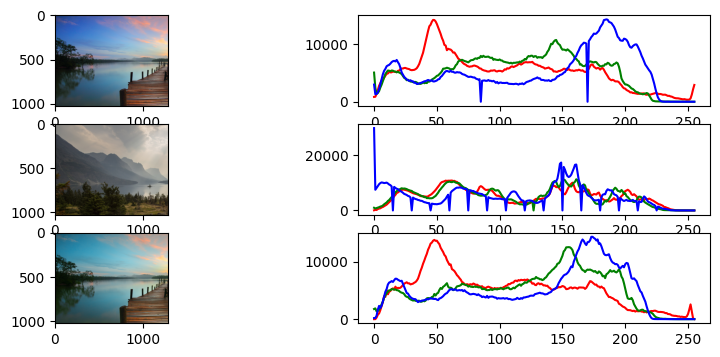

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [14]:
if __name__ == "__main__":
    root = tk.Tk()
    app = InterfaceGraphique(root)
    root.geometry("400x400")  # Taille initiale de la fenêtre
    root.mainloop()